In [69]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#connects plotly to pandas

import cufflinks as cf
#make plotly work in your Notewook

from plotly.offline import download_plotlyjs,init_notebook_mode
, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()

In [70]:
import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df


In [3]:
#Arima Model: Finding P,D and Q
#Integration: Replacing with the difference
#Moving Average: Correcting Regression Errors over time
#Non-seasonal ARIMA Models
#p: Number of time lags of the AR model
#d: How many time was have to difference the data
# Represents the order of the MA Model
#Used AR or MA


In [162]:
pitt_df=pd.read_csv('https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/PittsburghWeather.csv',
                       index_col='Date',parse_dates=True)

In [163]:
pitt_df.head(5)

,tmax,tmin,prcp
Date,,,
1871-01-01,NaN,NaN,0.0
1871-01-02,NaN,NaN,0.0
1871-01-03,NaN,NaN,0.0
1871-01-04,NaN,NaN,0.0
1871-01-05,NaN,NaN,0.0


In [164]:
pitt_df=pitt_df.drop(['tmin','prcp'],axis=1)

In [165]:
pitt_df.head(5)

,tmax
Date,
1871-01-01,NaN
1871-01-02,NaN
1871-01-03,NaN
1871-01-04,NaN
1871-01-05,NaN


In [166]:
pitt_df=pitt_df[pitt_df.index>'1980-01-01']
pitt_df=pitt_df.asfreq('d')
pitt_df=pitt_df.fillna(method='ffill')
pitt_df.index

DatetimeIndex(['1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
               '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09',
               '1980-01-10', '1980-01-11',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=14609, freq='D')

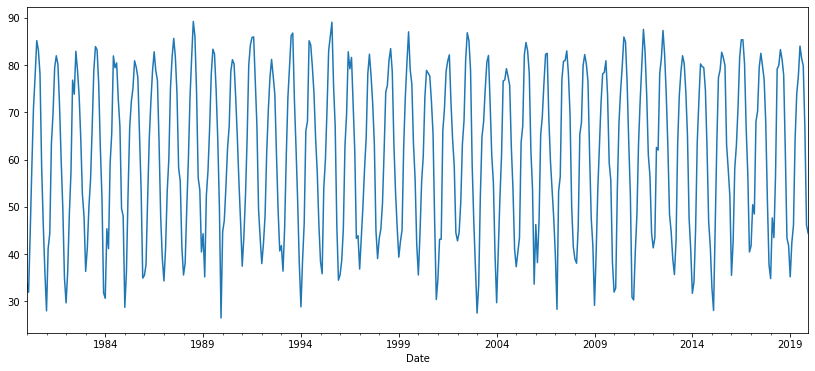

In [167]:
from statsmodels.tsa.stattools import adfuller
pitt_df=pitt_df['tmax'].resample(rule='MS').mean()
pitt_df.plot(figsize=(14,6))
def adf_test(timeseries):
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value'])
    print(dfoutput)

In [168]:
pitt_df.head(5)

Date
1980-01-01    33.666667
1980-02-01    31.896552
1980-03-01    44.580645
1980-04-01    58.333333
1980-05-01    70.870968
Freq: MS, Name: tmax, dtype: float64

In [133]:
from statsmodels.tsa.stattools import acovf,acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARMARResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

ImportError: cannot import name 'ARMARResults' from 'statsmodels.tsa.arima_model' (C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py)

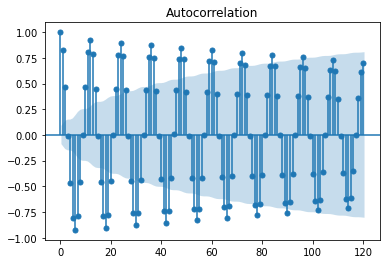

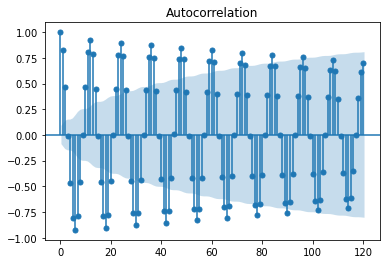

In [85]:
sm.graphics.tsa.plot_acf(pitt_df.values.squeeze(),lags=120)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:994: FutureWarning:

ywunbiased has been renamed ywadjusted. After release 0.13, using the old name will raise.

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



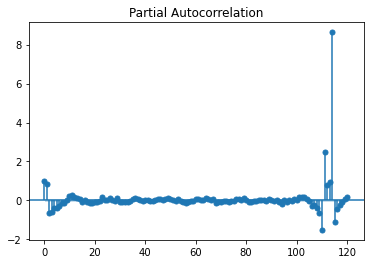

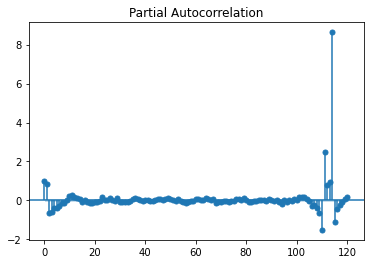

In [89]:
sm.graphics.tsa.plot_pacf(pitt_df.values.squeeze(),lags=120,
                         method='ywunbiased')

In [90]:
pip install pmdarima

You should consider upgrading via the 'C:\Users\ASUS\anaconda3\python.exe -m pip install --upgrade pip' command.


In [93]:
from pmdarima import auto_arima
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [95]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
step_fit=auto_arima(pitt_df,start_p=0,start_q=0,max_p=5,max_q=3,
                   seasonal=False,trace=True)
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5347.862, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3581.108, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4761.543, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3425.661, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3417.572, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3363.796, Time=0.45 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3276.687, Time=0.54 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2990.853, Time=2.65 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=2.57 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=3.84 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2868.026, Time=2.81 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.58 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=4.60 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3407.840, Time=0.69 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2934.645, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  480
Model:               SARIMAX(4, 0, 2)   Log Likelihood               -1427.013
Date:                Fri, 29 Oct 2021   AIC                           2868.026
Time:                        11:32:34   BIC                           2897.243
Sample:                             0   HQIC                          2879.510
                                - 480                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2913      0.037     61.492      0.000       2.218       2.364
ar.L2         -1.5326      0.101    -15.170      0.000      -1.731      -1.335
ar.L3         -0.1923      0.101     -1.904      0.057      -0.390       0.006
ar.L4          0.4337      0.037     11.648      0.000       0.361       0.507
ma.L1         -1.7699      0.022    -79.666      0.000      -1.813      -1.726
ma.L2          0.9152      0.022     42.496      0.000       0.873       0.957
sigma2        21.6065      1.366     15.823      0.000      18.930      24.283
===================================================================================
Ljung-Box (L1) (Q):                   3.60   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.06   Prob(JB):                         0.29
Heteroskedasticity (H):               1.34   Skew:                             0.09
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

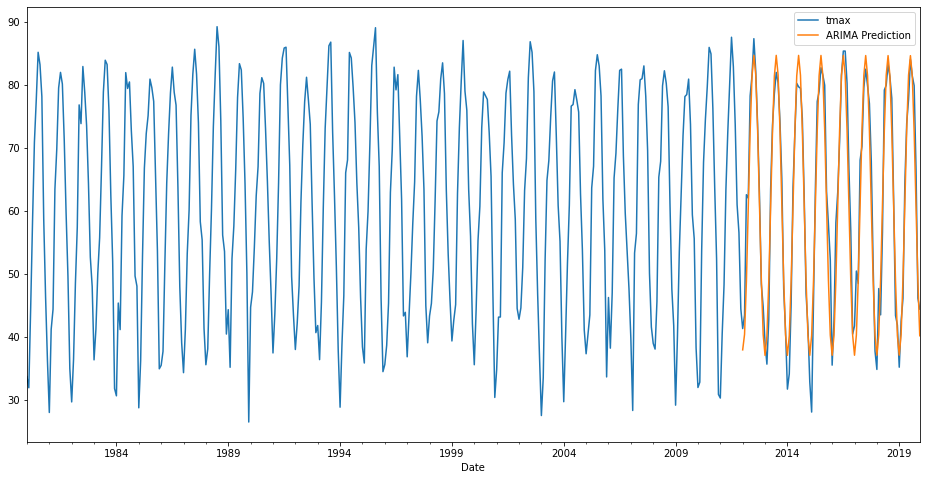

In [172]:
#arimax(4,0,2)
pitt.size #480
train_df=pitt_df.iloc[:384]
test_df=pitt_df.iloc[384:]
mod=ARIMA(train_df,order=(4,0,2))
res=mod.fit()
res.summary()

start=len(train_df)
end=len(train_df)+len(test_df)-1
prediction=res.predict(start,end).rename('ARIMA Prediction')
pitt_df.plot(figsize=(16,8),legend=True)
prediction.plot(legend=True)

In [124]:
flight_df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [125]:
flight_df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [126]:
flight_df['day']='01'

In [127]:
flight_df.head(5)

,year,month,passengers,day
0,1949,January,112,01
1,1949,February,118,01
2,1949,March,132,01
3,1949,April,129,01
4,1949,May,121,01


In [128]:
flight_df['month']=pd.to_datetime(flight_df.month,format='%B').dt.month
flight_df['date']=pd.to_datetime(flight_df[['year','month','day']])
flight_df.drop('year',axis=1,inplace=True)
flight_df.drop('month',axis=1,inplace=True)
flight_df.drop('day',axis=1,inplace=True)
flight_df.set_index('date',inplace=True)
step_fit=auto_arima(flight_df,start_p=0,start_q=0,max_p=5,max_q=3,
                   seasonal=True,trace=True,m=12)
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=1.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=1.24 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.81 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=1.28 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.81 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.72 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.05 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.71 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=24.30 sec
 ARIMA(0,1,1)(1,1,1)[12]    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 29 Oct 2021   AIC                           1019.178
Time:                                     11:48:35   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
d_set=pitt_df
split=round(len(d_set)/2)
d_set1=d_set[:split]
d_set2=d_set[split:]
print("Mean 1:",d_set1.mean())
print("Mean 2:",d_set1.mean())
print("Variance 1:",d_set1.var())
print("Variance 2:",d_set1.var())


Mean 1: 60.862379330208164
Mean 2: 60.862379330208164
Variance 1: 291.9698973896791
Variance 2: 291.9698973896791


In [156]:
adf_test(d_set)

ValueError: Length of passed values is 4, index implies 2.